#Convección lineal en una dimensión.
##Josué Juárez Morales
[12 steps to N-S](https://www.theoj.org/jose-papers/jose.00021/10.21105.jose.00021.pdf)
-------------------------


La ecuación de convección lineal en una dimensión es
\begin{equation}
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0,
\end{equation}
con una condición inicial
\begin{equation}
u(x, t=0) = u_{0}(x),
\end{equation}
la solución de esta ecuación diferencial es
\begin{equation}
u(x,t) = u_{0}(x-ct).
\end{equation}

La interpretación de esta ecuación es que para un perfil $u_{0}(x)$ que es desplazado a velocidad $c$ después de un tiempo $t$, entonces $u(x)$ es simplemente el perfil inicial desplazado una distancia $x = ct$.

#Discretización
-------------------------
El siguiente paso es discretizar la ecuación diferencial. 
Recordamos que la definición de derivada es
\begin{equation}
\frac{d}{dx}f(x) = \lim\limits_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}.
\end{equation}
Si discretizamos la coordenada espacial en el conjunto de puntos  $x = (x_1, \dots , x_n)$ y aumentos discretos de tiempo $\Delta t$, entonces la ecuación discreta es
\begin{equation}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0,
\end{equation}
donde para la derivada temporal, se utiliza una diferenciación hacia adelante, y hacia atrás para la derivada espacial. Dependiendo de que tan pequeños sean los $\Delta x$ y $\Delta t$ la aproximación es mas parecida a la derivada real.

$n$ y $n-1$ representan dos pasos consecutivos en el tiempo, mientras que $i$ e $i-1$ son dos puntos vecinos de la coordenada $x$ discretizada. Si la condición inicial esta dada, entonces el valor $u_i^{n+1}$ es la única incógnita en la ecuación discretizada. Si despejamos para esta función obtenemos una ecuación que permite avanzar en el tiempo
\begin{equation}
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n).
\end{equation}

#Ejemplo
-------------------------
Definimos
\begin{equation}
u(x_0, x_l, x)= \left\{ \begin{array}{lcc}
             0 &   si  & x < x_0 \\
             \\ 1 &  si & x_0 \leq x < x_l \\
             \\ 0 &  si  & x > x_l 
             \end{array}
   \right.,
\end{equation}
el cual representa un pulso entre los valores $x_0$ y $x_l$.

Procedemos a implementarlo en código

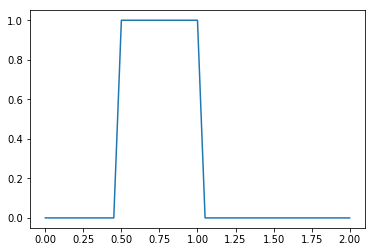

In [0]:
import numpy as np #importa numpy.
import matplotlib.pyplot as plt #importa la herramienta para graficar
%matplotlib inline
#hace que las gráficas aparescan en la siguiente linea

def pulso(x0, x1, x): #define la función pulso
  if x < x0 or x > x1:
    return(0.0)
  else:
    return(1.0)

L = 2 #el tamaño de nuestro intervalo en x
nx = 41 #el número en que se va a discretizar la variable x
dx = L/(nx-1) #la distancia que hay entre cada punto discretizado x (dx)
T = 1.0 #intervalo total de tiempo
nt = 51 #número de veces que se discretiza la variable tiempo
dt = T/(nt-1) #tamaño de los intervalos de tiempo (dt)
c = 1.0 #velocidad de la onda (e.d.)
u = np.linspace(0, L, nx) #np.linspace genera un vector con nx entradas que contiene números igualmente espaciados en un intervalo (0,L)
x = np.linspace(0, L, nx) #generamos dos porque uno va a entrar a la funcion pulso
#print(u) #u = x en este caso

for i in range(len(x)):
  u[i] = pulso(0.5, 1.0, x[i]) #es de hecho la condicion inicial

#print(u) #x ahora esta evaluada en la función pulso

plt.plot(x,u)

Ahora implementamos la discretización, para cada elemento de $u$ se debe realizar la operación
\begin{equation}
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n),
\end{equation}
el código que realiza esto es

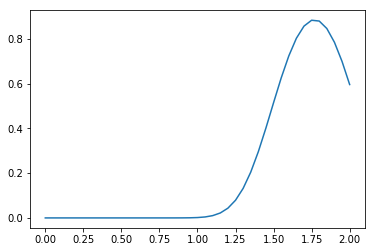

In [0]:
un = np.zeros(nx) #crea un vector temporal de tamaño nx con entradas ceros
for n in range(nt): #genera el loop nt veces
  un = u.copy() #copia los elementos de u al vector temporal un
  for i in range(1,nx): #el loop realiza las operaciones para calcular el u^{n+1}_{i}, pero comienza con el elemento u[1] y no u[o] (se salta el primer elemento)
    u[i] = un[i]- c*dt*(un[i]-un[i-1])/dx

plt.plot(x,u)

El pulso se desplazo hacia la derecha y dejó de ser de forma cuadrada. La razón por la que ya no es cuadrada, es que, el número de veces en que se dividió la variable $x$ es muy pequeña y la aproximación de la derivada no es muy buena. Esto se corrige dando un valor más grande al `nx`, pero también, valores grandes de `nx` producen inestabilidad númerica.

Si en el ```for``` donde se calcula el elemento $u_i^{n+1}$ no se salta el primer elemento, lo que sucede es

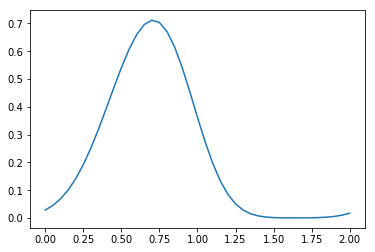

In [0]:
un = np.zeros(nx)
for n in range(nt):
  un = u.copy()
  for i in range(nx): #no se salta el primer elemento
    u[i] = un[i]- c*dt*(un[i]-un[i-1])/dx

plt.plot(x,u)

Se debe de empezar el `for(1, nx)` asi, porque de la ecuacion iterada, si se comienza desde el número $i = 0$, se necesitaría el elemento $i = -1$ para realizar el calculo; ese elemento no se encuentra en la lista de puntos `u`. El programa funciona porque en python el elmento $i = -1$ es el último elemento de una lista.